In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import scale,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error,r2_score,roc_auc_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action='ignore')
sns.set()
plt.style.use('ggplot')
%matplotlib inline

In [7]:
diabet_data=pd.read_csv('diabetes.csv')

In [9]:
diabet_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
diabet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
diabet_data.shape

(768, 9)

In [15]:
diabet_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:
diabet_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [23]:
diabet_data.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [25]:
diabet_data.Outcome.value_counts(normalize=True)*100

Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64

In [29]:
diabet_data.columns.to_list()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

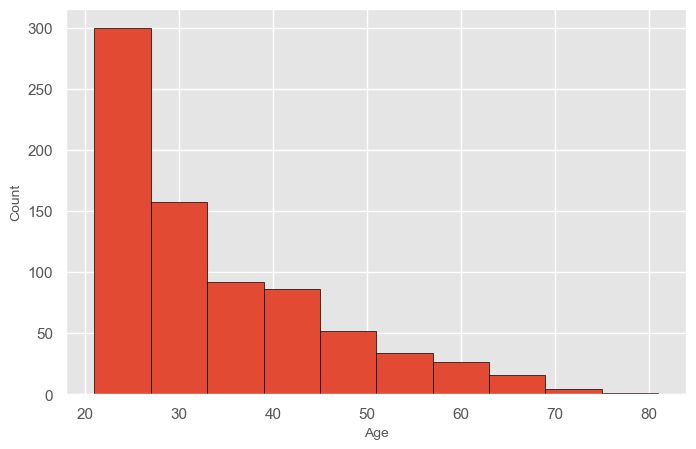

In [37]:
plt.figure(figsize=(8,5))
plt.xlabel('Age',fontsize=10)
plt.ylabel('Count',fontsize=10)
diabet_data['Age'].hist(edgecolor='black');

In [41]:
print('Max Age: '+str(diabet_data['Age'].max()))
print('Min Age: '+str(diabet_data['Age'].min()))

Max Age: 81
Min Age: 21


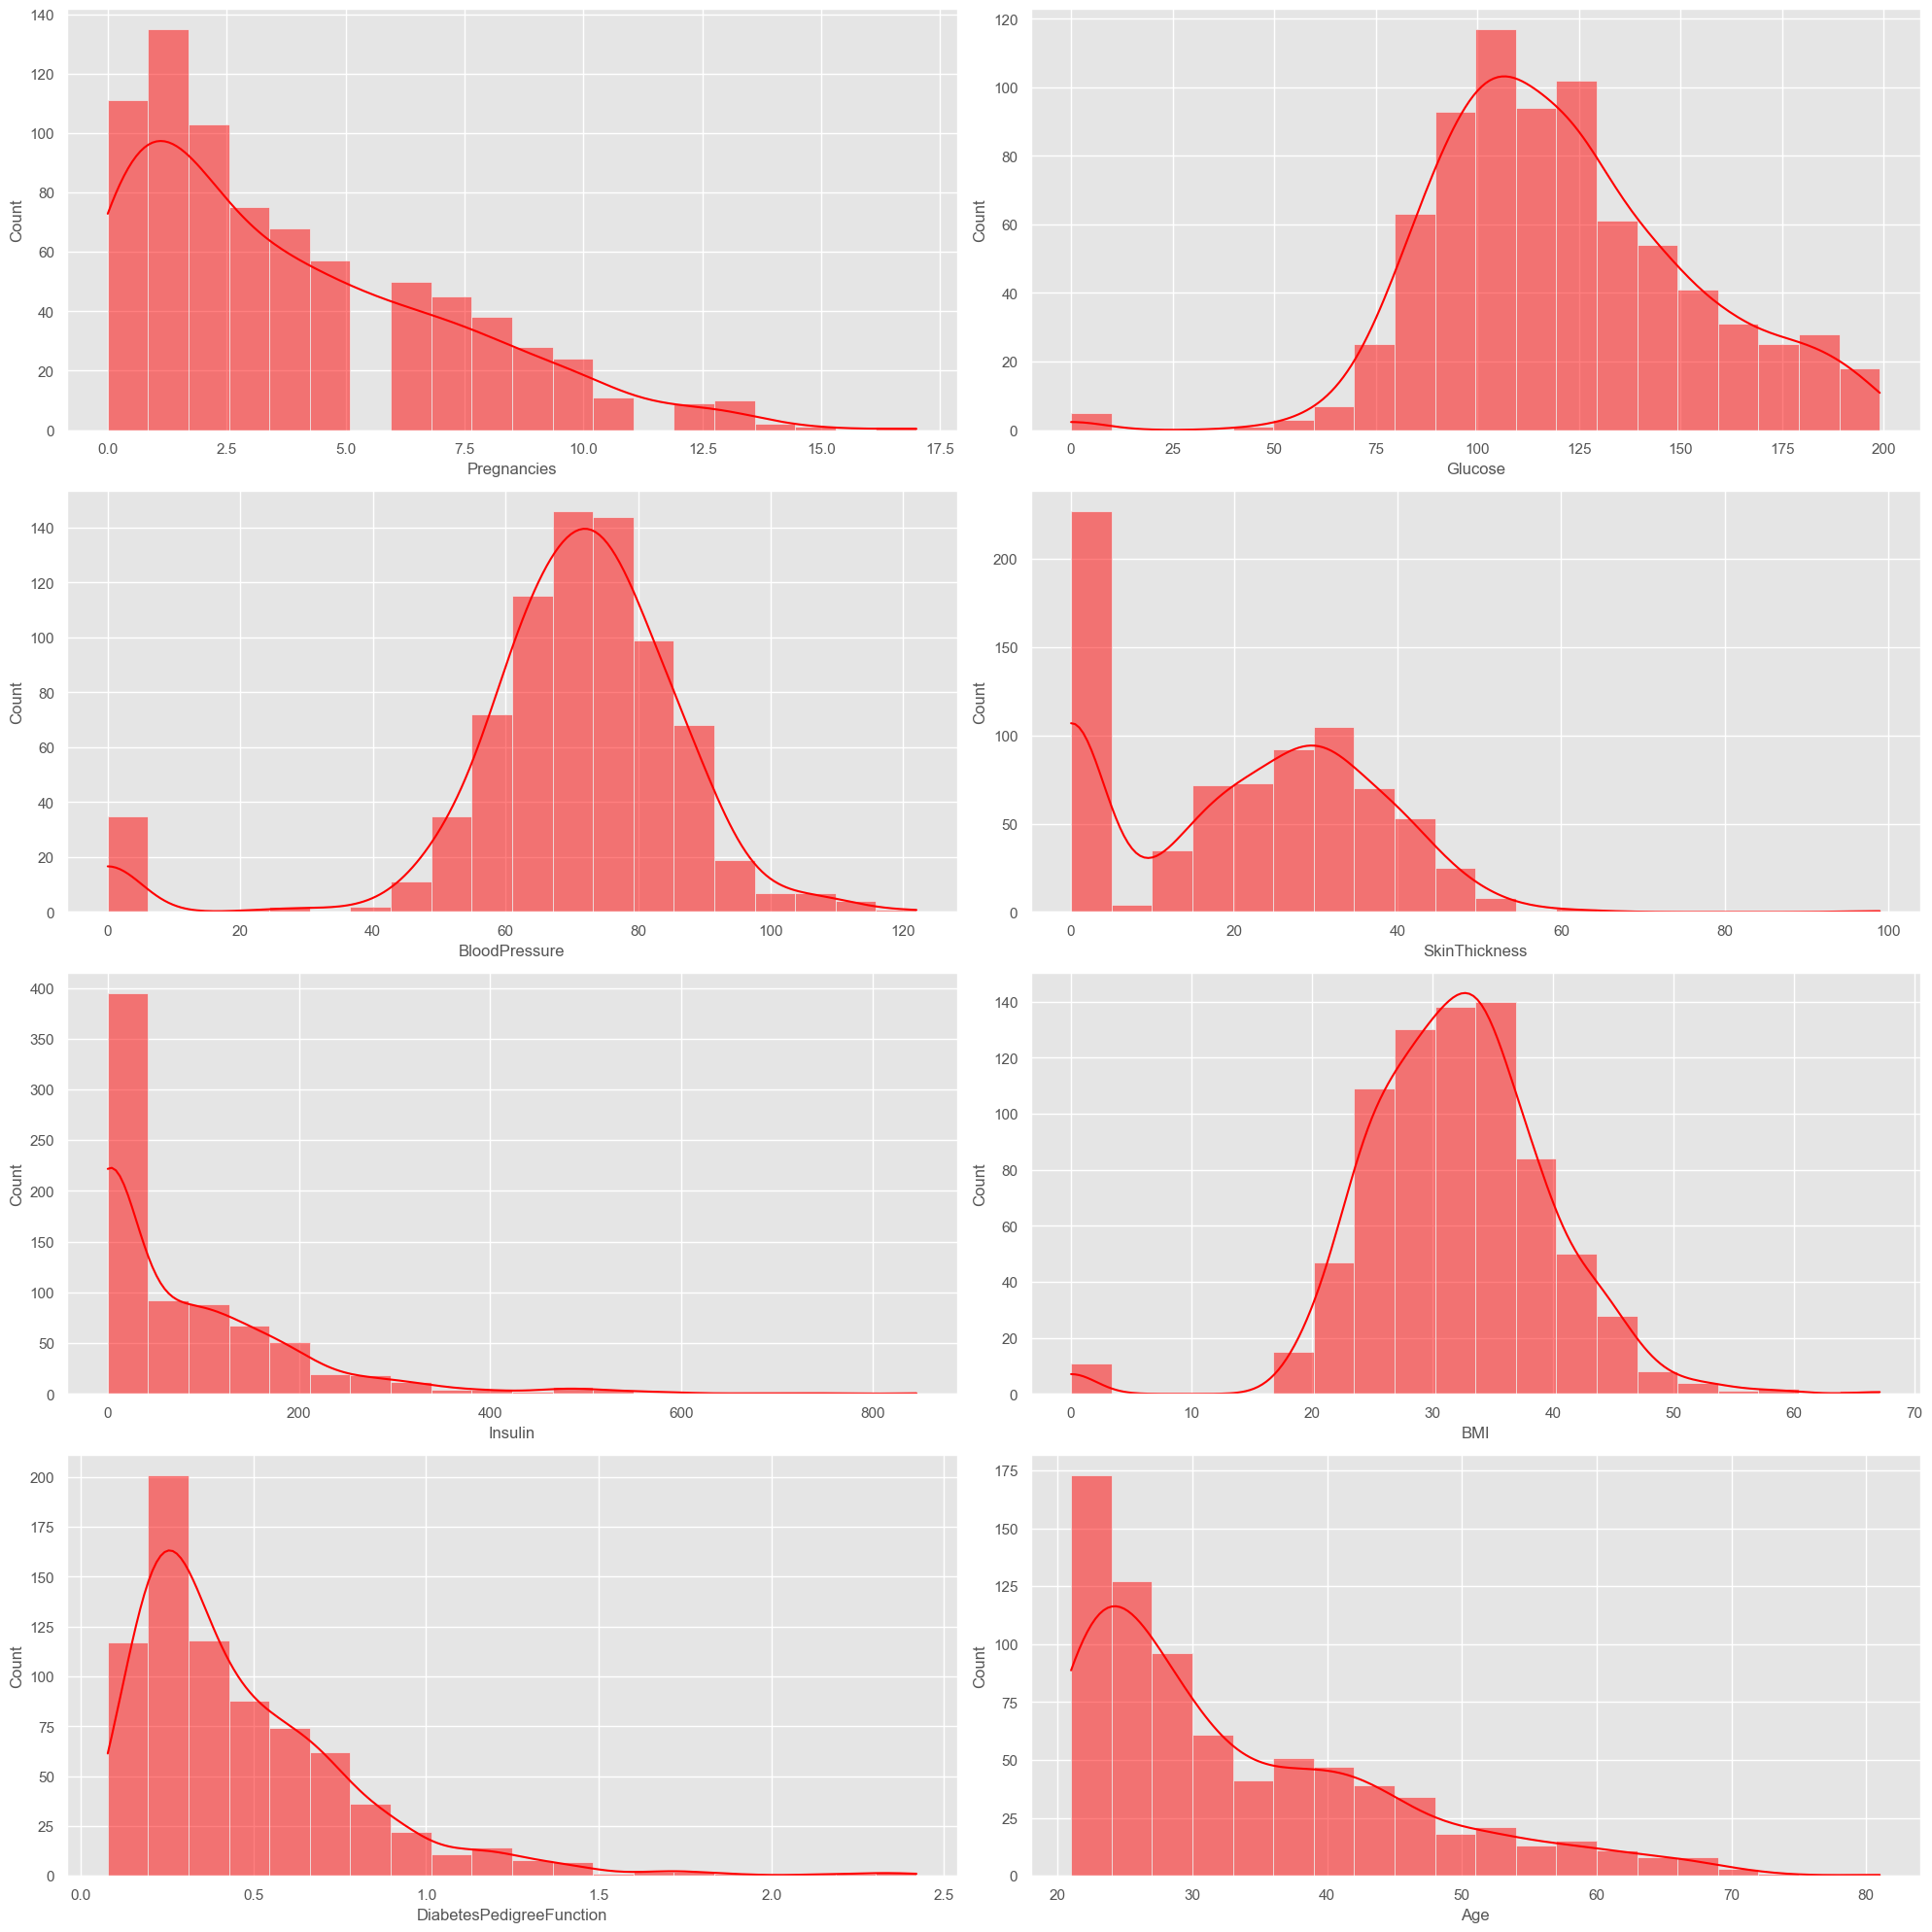

In [67]:
fig,ax=plt.subplots(4,2,figsize=(20,20))
sns.histplot(diabet_data['Pregnancies'],bins=20,ax=ax[0,0],kde=True,color='red')
sns.histplot(diabet_data.Glucose,bins=20,ax=ax[0,1],kde=True,color='red')
sns.histplot(diabet_data.BloodPressure,bins=20,ax=ax[1,0],kde=True,color='red')
sns.histplot(diabet_data.SkinThickness,bins=20,ax=ax[1,1],kde=True,color='red')
sns.histplot(diabet_data.Insulin,bins=20,ax=ax[2,0],kde=True,color='red')
sns.histplot(diabet_data.BMI,bins=20,ax=ax[2,1],kde=True,color='red')
sns.histplot(diabet_data.DiabetesPedigreeFunction,bins=20,ax=ax[3,0],kde=True,color='red')
sns.histplot(diabet_data.Age,bins=20,ax=ax[3,1],kde=True,color='red')
plt.tight_layout()
plt.show()

In [71]:
diabet_data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [77]:
diabet_data.groupby('Outcome').agg({'Glucose':'max'})

,Glucose
Outcome,
0,197
1,199


In [82]:
diabet_data.groupby('Outcome').max()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,13,197,122,60,744,57.3,2.329,81
1,17,199,114,99,846,67.1,2.420,70


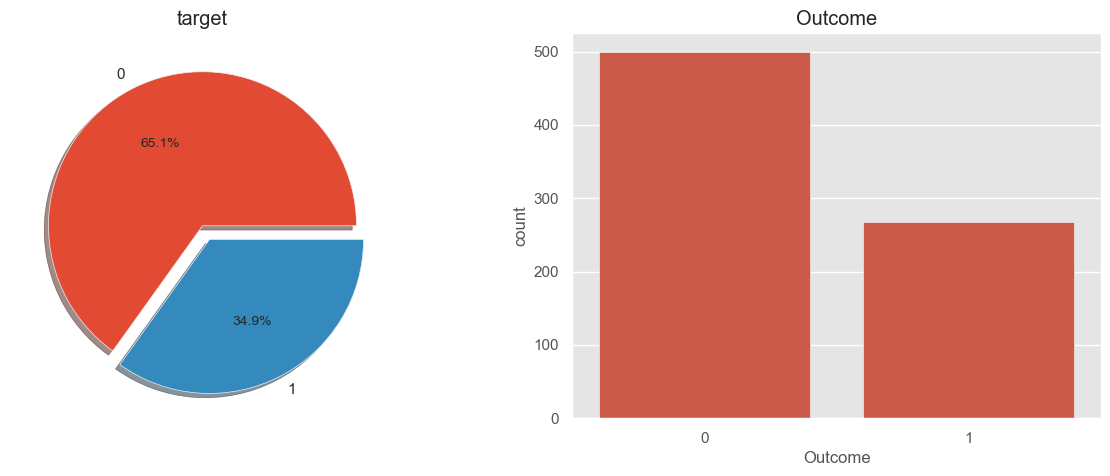

In [93]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
diabet_data['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot(x=diabet_data['Outcome'],ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

In [95]:
diabet_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

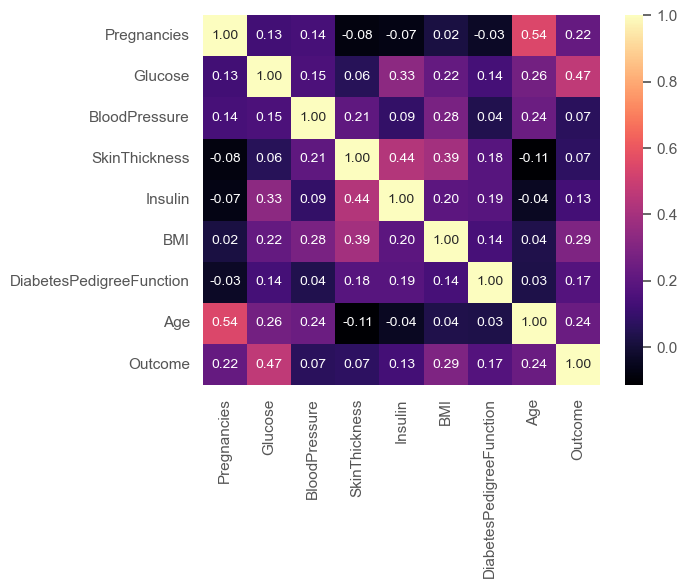

In [101]:
sns.heatmap(diabet_data.corr(),annot=True,fmt='.2f',cmap='magma')

In [103]:
diabet_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [105]:
diabet_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [109]:
diabet_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]=diabet_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0,np.NaN)

In [111]:
diabet_data.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [113]:
diabet_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


<Axes: >

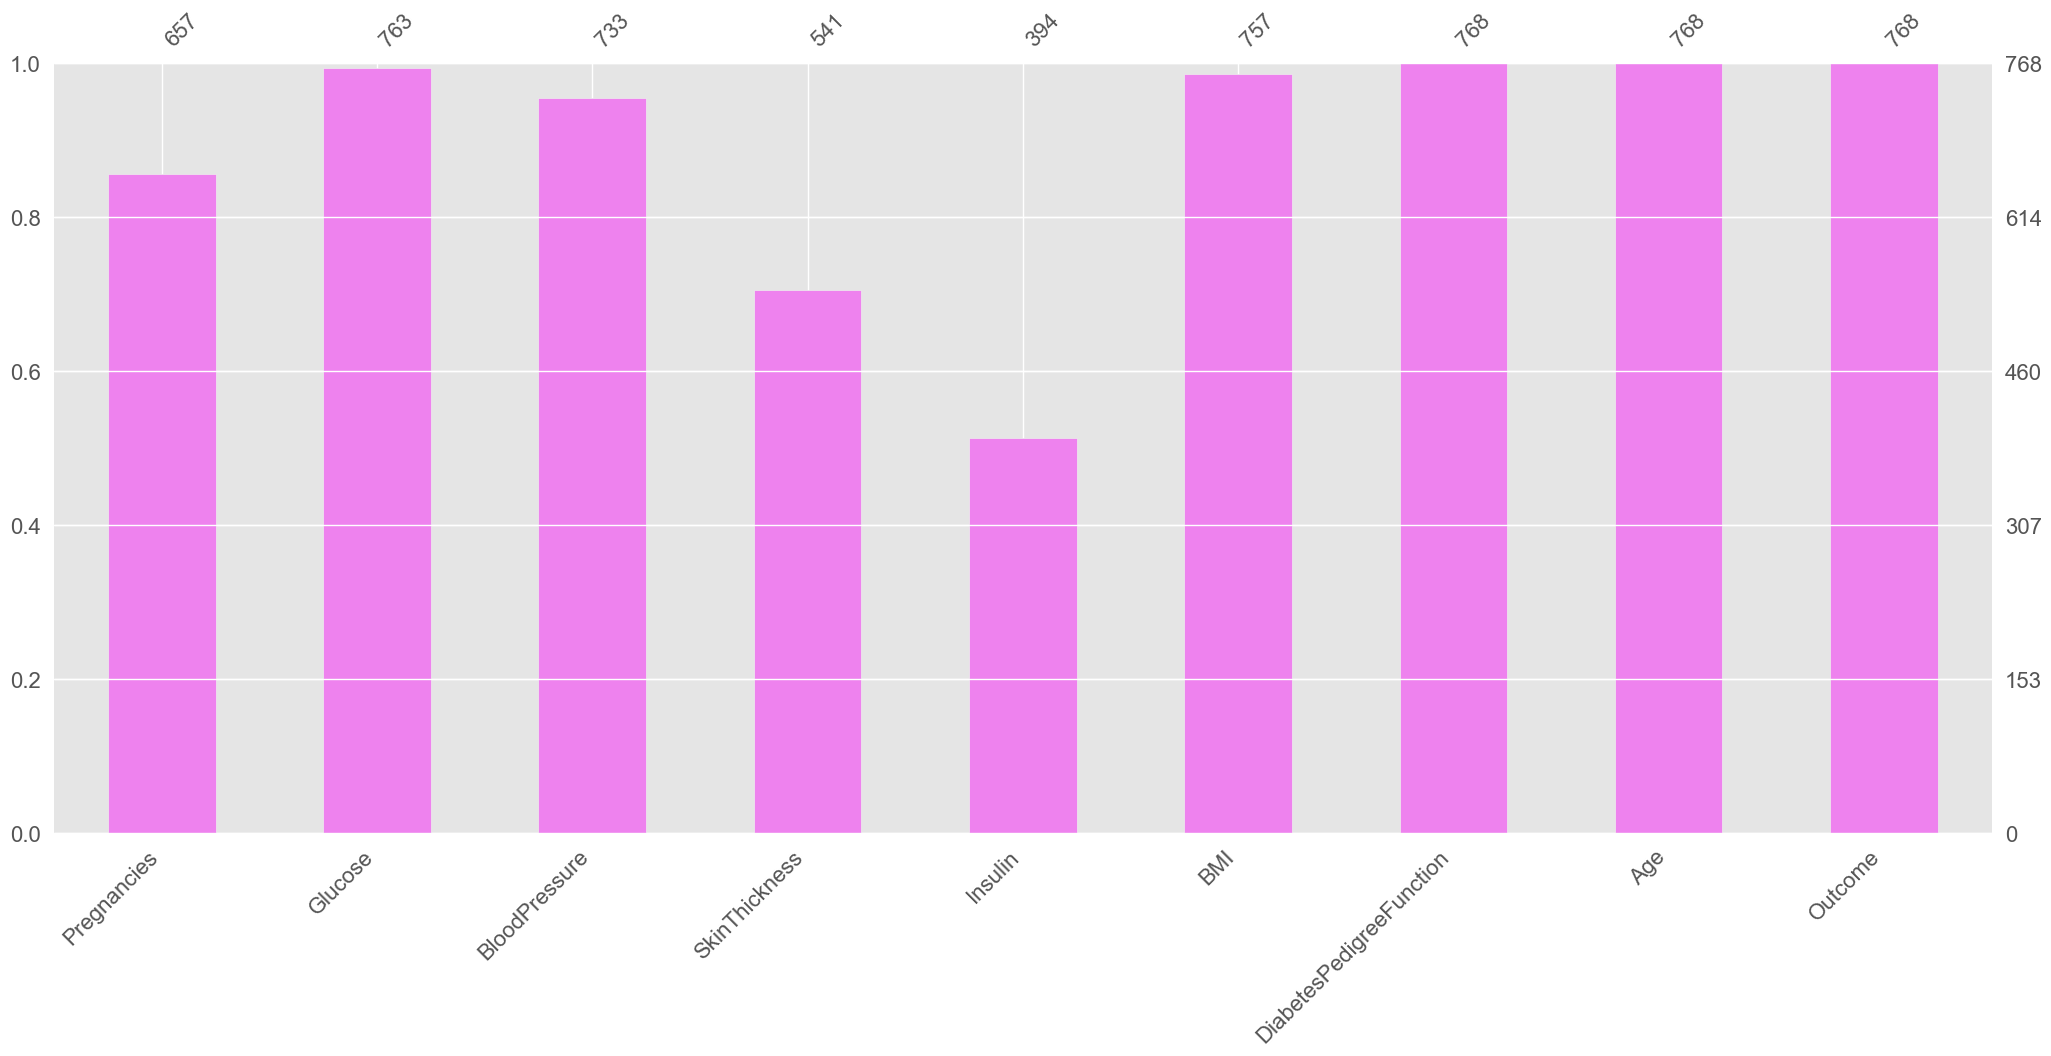

In [115]:
import missingno as msno
msno.bar(diabet_data,color='violet')

In [125]:
def target_median(x):
    temp=diabet_data[diabet_data[x].notnull()]
    temp=temp[[x,'Outcome']].groupby(['Outcome'])[[x]].median().reset_index()
    return temp

In [127]:
columns=diabet_data.columns
columns=columns.drop('Outcome')
for i in columns:
    target_median(i)
    diabet_data.loc[(diabet_data['Outcome']==0) & (diabet_data[i].isnull()),i]=target_median(i)[i][0]
    diabet_data.loc[(diabet_data['Outcome']==1) & (diabet_data[i].isnull()),i]=target_median(i)[i][1]

In [129]:
diabet_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [131]:
diabet_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

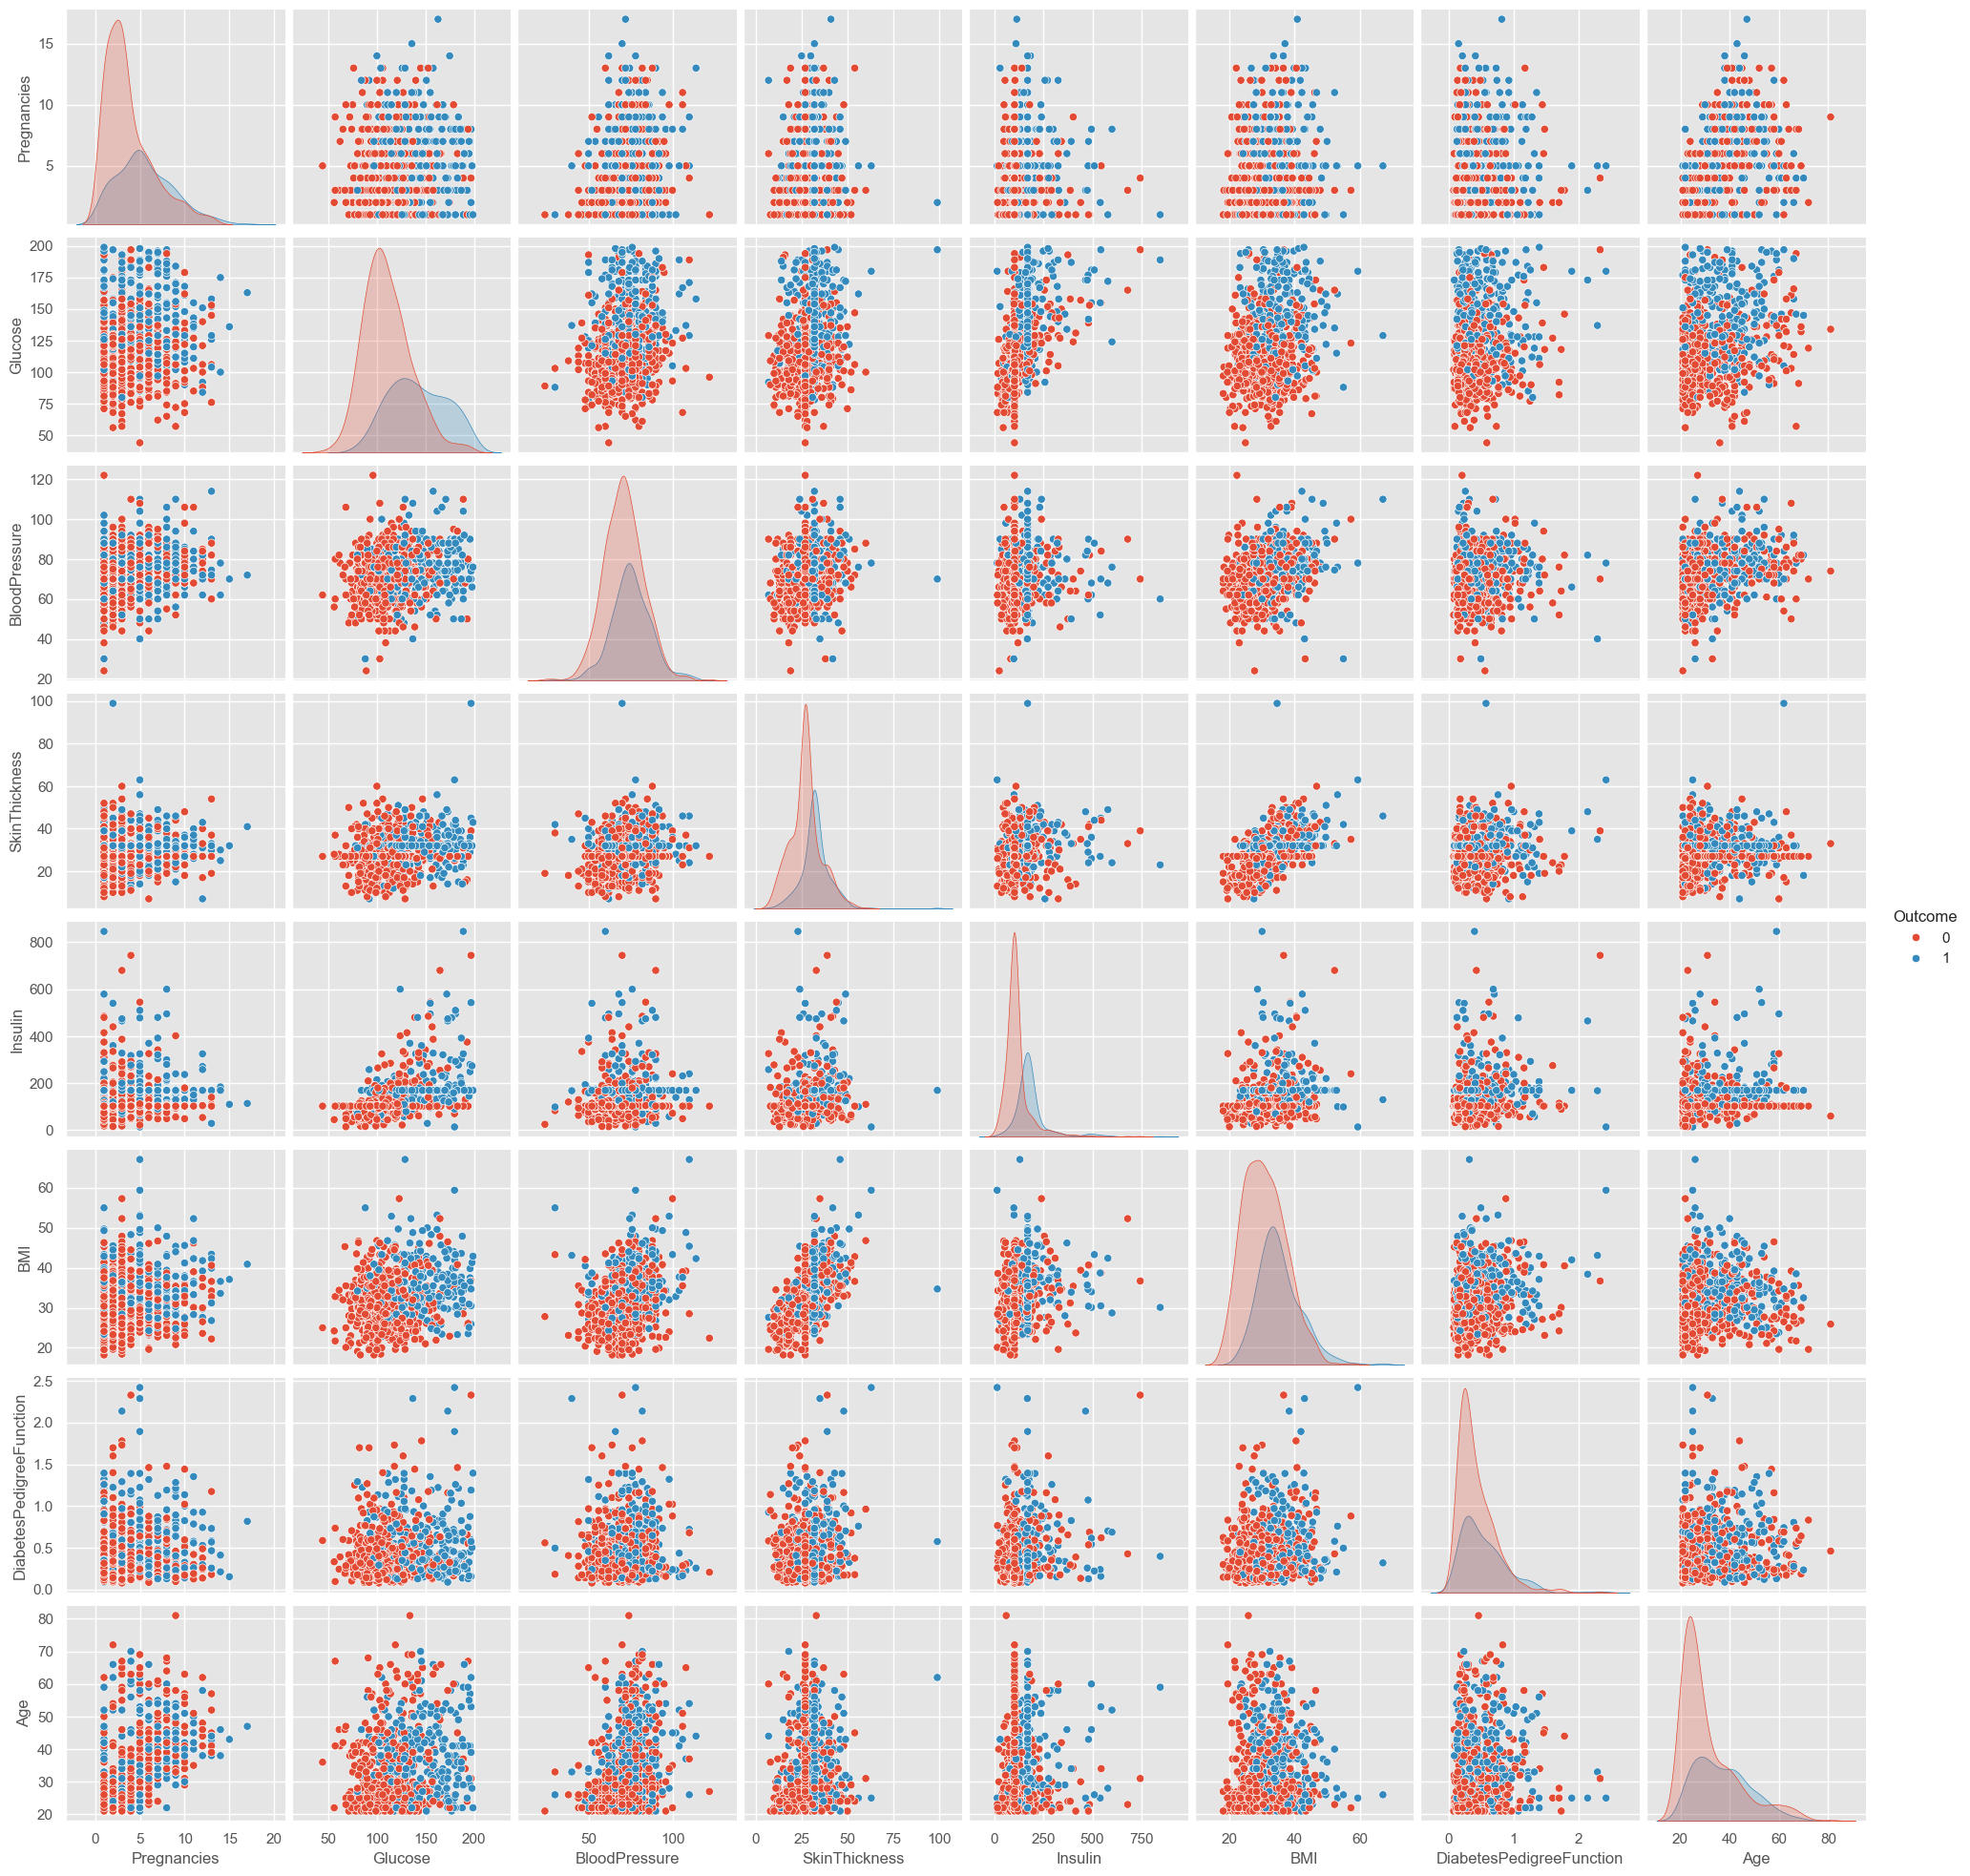

In [133]:
sns.pairplot(diabet_data,hue='Outcome')

In [137]:
for feature in diabet_data:
    Q1=diabet_data[feature].quantile(0.25)
    Q3=diabet_data[feature].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    if  diabet_data[(diabet_data[feature]>upper)].any(axis=None):
        print(feature,'yes')
    else:
        print(feature,'No')

Pregnancies yes
Glucose No
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome No


<Axes: xlabel='Insulin'>

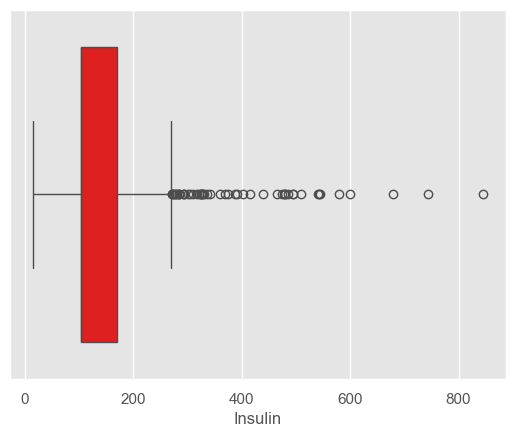

In [139]:
sns.boxplot(x= diabet_data['Insulin'],color='red')

In [141]:
Q1=diabet_data.Insulin.quantile(0.25)
Q3=diabet_data.Insulin.quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
diabet_data.loc[diabet_data['Insulin']>upper,'Insulin']=upper

<Axes: xlabel='Insulin'>

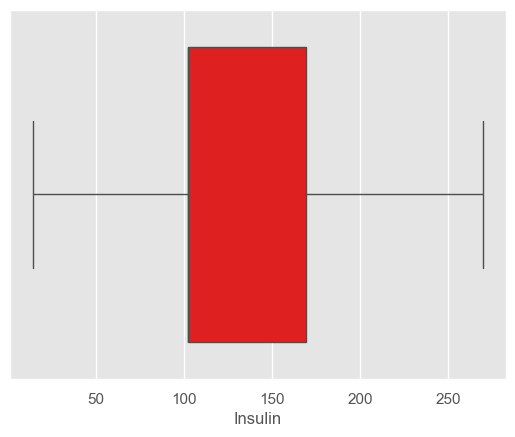

In [143]:
sns.boxplot(x= diabet_data['Insulin'],color='red')

In [150]:
#local outlier factor
from sklearn.neighbors import LocalOutlierFactor
lof=LocalOutlierFactor(n_neighbors=5)
lof.fit_predict(diabet_data)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [153]:
diabet_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


<Axes: xlabel='Pregnancies'>

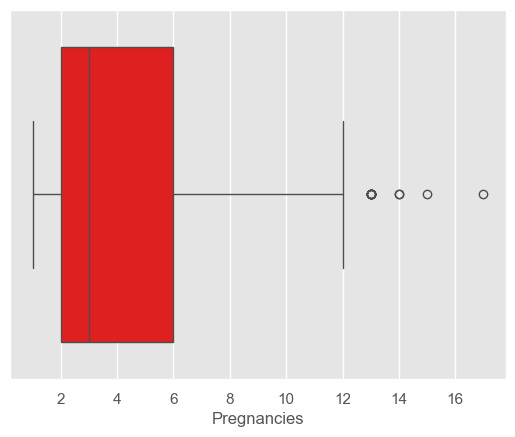

In [157]:
sns.boxplot(x= diabet_data['Pregnancies'],color='red')

In [159]:
diabet_data_score=lof.negative_outlier_factor_
np.sort(diabet_data_score)[0:20]

array([-3.07596595, -2.29587659, -2.27796657, -2.22029216, -1.93369522,
       -1.91383759, -1.9130843 , -1.88020639, -1.84669976, -1.79928915,
       -1.79316481, -1.74144183, -1.70450154, -1.69673558, -1.69052056,
       -1.6868981 , -1.64599498, -1.64199192, -1.6383457 , -1.63663465])

In [161]:
threshold=np.sort(diabet_data_score)[7]

In [163]:
threshold

-1.8802063897407522

In [165]:
outlier=diabet_data_score>threshold

In [169]:
diabet_data=diabet_data[outlier]

In [171]:
diabet_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [173]:
X=diabet_data.drop('Outcome',axis=1)
y=diabet_data['Outcome']

In [175]:
ss=StandardScaler()

In [177]:
X=ss.fit_transform(X)

In [184]:
X

array([[ 0.53926922,  0.87022248, -0.031066  , ...,  0.18672047,
         0.48483171,  1.46021781],
       [-1.12271215, -1.21111286, -0.53881136, ..., -0.86600623,
        -0.36470008, -0.18362293],
       [ 1.20406176,  2.02651989, -0.70805982, ..., -1.36229168,
         0.62334233, -0.097105  ],
       ...,
       [ 0.20687294, -0.02177838, -0.031066  , ..., -0.92616205,
        -0.69096953, -0.27014086],
       [-1.12271215,  0.14340696, -1.04655673, ..., -0.33964288,
        -0.3708561 ,  1.20066401],
       [-1.12271215, -0.94681631, -0.20031445, ..., -0.29452602,
        -0.47550857, -0.8757664 ]])

In [186]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [188]:
X_train

array([[-1.12271215,  2.35689057, -1.892799  , ..., -0.97127891,
         0.5710161 , -0.78924847],
       [-0.79031588,  1.10148196, -1.72355055, ...,  0.95370708,
        -0.7063596 , -0.70273053],
       [ 2.86604313,  1.20059316,  3.52315155, ...,  1.49510938,
        -0.65403337,  0.94111021],
       ...,
       [ 0.20687294,  1.82829747, -1.04655673, ...,  0.33711   ,
         1.85454782, -1.04880227],
       [-1.12271215, -0.48429735, -1.892799  , ..., -0.61034403,
        -0.88796241, -0.3566588 ],
       [-1.12271215, -0.71555683, -0.53881136, ..., -0.05390277,
        -0.0784448 ,  0.76807434]])

In [190]:
y_train

258    0
655    1
691    1
492    0
581    0
      ..
300    1
740    1
220    1
687    0
390    0
Name: Outcome, Length: 608, dtype: int64

In [192]:
#Logistic Regression

In [208]:
lr=LogisticRegression()
lr.fit(X_train,y_train)


LogisticRegression()

In [218]:
lr_y_pred=lr.predict(X_test)
lr_train=round(lr.score(X_train,y_train)*100,2)
lr_ac=round(accuracy_score(y_test,y_pred)*100,2)
lr_cm=confusion_matrix(y_test,y_pred)

In [222]:
print("Training Accuracy    :",lr_train ,"%")
print("Model Accuracy Score :",lr_ac ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
lr_cm

Training Accuracy    : 82.07 %
Model Accuracy Score : 77.63 %
--------------------------------------------------------


array([[89, 19],
       [15, 29]], dtype=int64)

In [226]:
lr_cr=classification_report(y_test,y_pred)
print(lr_cr)

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       108
           1       0.60      0.66      0.63        44

    accuracy                           0.78       152
   macro avg       0.73      0.74      0.74       152
weighted avg       0.78      0.78      0.78       152



In [228]:
#knn

In [230]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_y_pred=knn.predict(X_test)
knn_train=round(knn.score(X_train,y_train)*100,2)
knn_ac=round(accuracy_score(y_test,y_pred)*100,2)
knn_cm=confusion_matrix(y_test,y_pred)

In [232]:
print("Training Accuracy    :",knn_train ,"%")
print("Model Accuracy Score :",knn_ac ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
knn_cm

Training Accuracy    : 90.46 %
Model Accuracy Score : 77.63 %
--------------------------------------------------------


array([[89, 19],
       [15, 29]], dtype=int64)

In [242]:
knn_cr=classification_report(y_test,y_pred)
print(knn_cr)

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       108
           1       0.60      0.66      0.63        44

    accuracy                           0.78       152
   macro avg       0.73      0.74      0.74       152
weighted avg       0.78      0.78      0.78       152



In [ ]:
#svm

In [254]:
svc=SVC(probability=True)
parameter={
    'gamma':[0.0001,0.001,0.01,0.1],
    'C':[0.01,0.05,0.5,0.01,1,10,15,20]
}
grid_search=GridSearchCV(svc,parameter)
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.01, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [256]:
grid_search.best_params_

{'C': 20, 'gamma': 0.01}

In [258]:
grid_search.best_score_

0.8651402249017748

In [266]:
svc=SVC(C=20,gamma=0.01,probability=True)
svc.fit(X_train,y_train)
svc_y_pred=svc.predict(X_test)
svc_train=round(svc.score(X_train,y_train)*100,2)
svc_ac=round(accuracy_score(y_test,y_pred)*100,2)
svc_cm=confusion_matrix(y_test,y_pred)

In [268]:
print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_ac ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
svc_cm

Training Accuracy    : 87.83 %
Model Accuracy Score : 77.63 %
--------------------------------------------------------


array([[89, 19],
       [15, 29]], dtype=int64)

In [270]:
svc_cr=classification_report(y_test,y_pred)
print(svc_cr)

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       108
           1       0.60      0.66      0.63        44

    accuracy                           0.78       152
   macro avg       0.73      0.74      0.74       152
weighted avg       0.78      0.78      0.78       152



In [ ]:
#Decision Tree

In [276]:
dtc=DecisionTreeClassifier(criterion='gini',max_depth=10)
dtc.fit(X_train,y_train)
dtc_y_pred=dtc.predict(X_test)
dtc_train=round(dtc.score(X_train,y_train)*100,2)
dtc_ac=round(accuracy_score(y_test,y_pred)*100,2)
dtc_cm=confusion_matrix(y_test,y_pred)

In [278]:
print("Training Accuracy    :",dtc_train ,"%")
print("Model Accuracy Score :",dtc_ac ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
dtc_cm

Training Accuracy    : 99.67 %
Model Accuracy Score : 77.63 %
--------------------------------------------------------


array([[89, 19],
       [15, 29]], dtype=int64)

In [280]:
dtc_cr=classification_report(y_test,y_pred)
print(dtc_cr)

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       108
           1       0.60      0.66      0.63        44

    accuracy                           0.78       152
   macro avg       0.73      0.74      0.74       152
weighted avg       0.78      0.78      0.78       152



In [ ]:
#Random Forest

In [282]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_y_pred=rfc.predict(X_test)
rfc_train=round(rfc.score(X_train,y_train)*100,2)
rfc_ac=round(accuracy_score(y_test,y_pred)*100,2)
rfc_cm=confusion_matrix(y_test,y_pred)

In [284]:
print("Training Accuracy    :",rfc_train ,"%")
print("Model Accuracy Score :",rfc_ac ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
dtc_cm

Training Accuracy    : 100.0 %
Model Accuracy Score : 77.63 %
--------------------------------------------------------


array([[89, 19],
       [15, 29]], dtype=int64)

In [286]:
rfc_cr=classification_report(y_test,y_pred)
print(rfc_cr)

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       108
           1       0.60      0.66      0.63        44

    accuracy                           0.78       152
   macro avg       0.73      0.74      0.74       152
weighted avg       0.78      0.78      0.78       152



In [ ]:
#GradientBoosting

In [288]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)
gbc_y_pred=gbc.predict(X_test)
gbc_train=round(gbc.score(X_train,y_train)*100,2)
gbc_ac=round(accuracy_score(y_test,y_pred)*100,2)
gbc_cm=confusion_matrix(y_test,y_pred)

In [290]:
print("Training Accuracy    :",gbc_train ,"%")
print("Model Accuracy Score :",gbc_ac ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
dtc_cm

Training Accuracy    : 99.18 %
Model Accuracy Score : 77.63 %
--------------------------------------------------------


array([[89, 19],
       [15, 29]], dtype=int64)

In [292]:
gbc_cr=classification_report(y_test,y_pred)
print(gbc_cr)

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       108
           1       0.60      0.66      0.63        44

    accuracy                           0.78       152
   macro avg       0.73      0.74      0.74       152
weighted avg       0.78      0.78      0.78       152



In [298]:
models=pd.DataFrame({'Models':['LogisticRegression','K-nearest Neighbors','Support Vector Machines','DecisionTree','RandomForest','GradientBoosting'],
                    'Training Accuracy':[lr_train,knn_train,svc_train,dtc_train,rfc_train,gbc_train],
                    'Model Accuracy Score':[lr_ac,knn_ac,svc_ac,dtc_ac,rfc_ac,gbc_ac]})

In [318]:
models.sort_values(by='Model Accuracy Score').style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'font-size': '15px'
        })

,Models,Training Accuracy,Model Accuracy Score
0,LogisticRegression,82.070000,77.630000
1,K-nearest Neighbors,90.460000,77.630000
2,Support Vector Machines,87.830000,77.630000
3,DecisionTree,99.670000,77.630000
4,RandomForest,100.000000,77.630000
5,GradientBoosting,99.180000,77.630000


<h3>Prediction</h3>

In [325]:
prediction=dtc.predict(X_test)
print(prediction)

[1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1
 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1
 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0
 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0
 1 0 0 0]


In [327]:
pred_checking=pd.DataFrame({'Actual':y_test,'Predicted':prediction})
pred_checking.sample(5).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

,Actual,Predicted
92,0,0
243,1,1
615,0,0
327,0,0
27,0,0
